In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/nyc_temperatures.csv')

In [3]:
df.head()

,attributes,datatype,date,station,value
0,"H,,S,",TAVG,2018-10-01T00:00:00,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01T00:00:00,GHCND:USW00014732,25.6
2,",,W,2400",TMIN,2018-10-01T00:00:00,GHCND:USW00014732,18.3
3,"H,,S,",TAVG,2018-10-02T00:00:00,GHCND:USW00014732,22.7
4,",,W,2400",TMAX,2018-10-02T00:00:00,GHCND:USW00014732,26.1


In [4]:
df.index

RangeIndex(start=0, stop=93, step=1)

In [5]:
df.columns

Index(['attributes', 'datatype', 'date', 'station', 'value'], dtype='object')

In [6]:
df.rename(
columns = {
    'value': 'temp_C',
    'attributes': 'flags'
}, inplace=True)

In [8]:
df.rename(str.upper, axis=1).columns

Index(['FLAGS', 'DATATYPE', 'DATE', 'STATION', 'TEMP_C'], dtype='object')

In [9]:
df.dtypes

flags        object
datatype     object
date         object
station      object
temp_C      float64
dtype: object

In [10]:
df.loc[:,'date'] = pd.to_datetime(df.date)

In [11]:
df.dtypes

flags               object
datatype            object
date        datetime64[ns]
station             object
temp_C             float64
dtype: object

In [12]:
df.head()

,flags,datatype,date,station,temp_C
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1


In [15]:
df.dtypes

flags               object
datatype            object
date        datetime64[ns]
station             object
temp_C             float64
dtype: object

In [22]:
df = df.assign(
temp_C_whole = df.temp_C.astype('int'),
    
temp_F=(df.temp_C * 9/5) + 32,
    
temp_F_whole = lambda x: x.temp_F.astype('int')  ## NOTE! Unless lambda exp - we coudn't refer to temp_F!
)

In [23]:
df_with_categories = df.assign(
station = df.station.astype('category'),
    datatype = df.datatype.astype('category')
)

In [24]:
df_with_categories.dtypes

flags                   object
datatype              category
date            datetime64[ns]
station               category
temp_C                 float64
temp_C_whole             int32
temp_F                 float64
temp_F_whole             int32
dtype: object

In [27]:
df_with_categories.describe()

,temp_C,temp_C_whole,temp_F,temp_F_whole
count,93.000000,93.000000,93.000000,93.000000
mean,15.408602,14.956989,59.735484,59.215054
std,6.133703,6.084396,11.040666,11.128547
min,5.600000,5.000000,42.080000,42.000000
25%,10.200000,10.000000,50.360000,50.000000
50%,14.400000,14.000000,57.920000,57.000000
75%,21.100000,21.000000,69.980000,69.000000
max,27.800000,27.000000,82.040000,82.000000


In [32]:
df.loc[df.temp_C.idxmax()]

flags                      ,,W,2400
datatype                       TMAX
date            2018-10-07 00:00:00
station           GHCND:USW00014732
temp_C                         27.8
temp_C_whole                     27
temp_F                        82.04
temp_F_whole                     82
Name: 19, dtype: object

In [36]:
df

,flags,datatype,station,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,"H,,S,",TAVG,GHCND:USW00014732,21.2,21,70.16,70
2018-10-01,",,W,2400",TMAX,GHCND:USW00014732,25.6,25,78.08,78
2018-10-01,",,W,2400",TMIN,GHCND:USW00014732,18.3,18,64.94,64
2018-10-02,"H,,S,",TAVG,GHCND:USW00014732,22.7,22,72.86,72
2018-10-02,",,W,2400",TMAX,GHCND:USW00014732,26.1,26,78.98,78
2018-10-02,",,W,2400",TMIN,GHCND:USW00014732,19.4,19,66.92,66
2018-10-03,"H,,S,",TAVG,GHCND:USW00014732,21.8,21,71.24,71
2018-10-03,",,W,2400",TMAX,GHCND:USW00014732,25.0,25,77.00,77
2018-10-03,",,W,2400",TMIN,GHCND:USW00014732,18.9,18,66.02,66


In [35]:
df.set_index('date',inplace=True)

In [3]:
import pandas as pd
sp = pd.read_csv('data/sp500.csv', index_col='date', parse_dates=True).drop(columns=['adj_close'])

In [4]:
sp.head()

,high,low,open,close,volume
date,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000


In [5]:
sp.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=502, freq=None)

In [6]:
sp.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Tuesday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='date', length=502)

In [15]:
sp.head().assign(day_of_week = lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday


In [16]:
bitcoin = pd.read_csv('data/bitcoin.csv', index_col='date', parse_dates=True).drop(columns=['market_cap'])

In [38]:
bitcoin.head(10)

,open,high,low,close,volume
date,,,,,
2017-01-01,963.66,1003.08,958.70,998.33,147775008
2017-01-02,998.62,1031.39,996.70,1021.75,222184992
2017-01-03,1021.60,1044.08,1021.60,1043.84,185168000
2017-01-04,1044.40,1159.42,1044.40,1154.73,344945984
2017-01-05,1156.73,1191.10,910.42,1013.38,510199008
2017-01-06,1014.24,1046.81,883.94,902.20,351876000
2017-01-07,903.49,908.59,823.56,908.59,279550016
2017-01-08,908.17,942.72,887.25,911.20,158715008
2017-01-09,913.24,913.69,879.81,902.83,141876992


In [31]:
portfolio = pd.concat([sp,bitcoin], sort=False).groupby(pd.Grouper(freq='D')).sum()
portfolio.assign(day_of_week= lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


In [32]:
portfolio[pd.isnull(portfolio).any(axis=1)]

,high,low,open,close,volume
date,,,,,


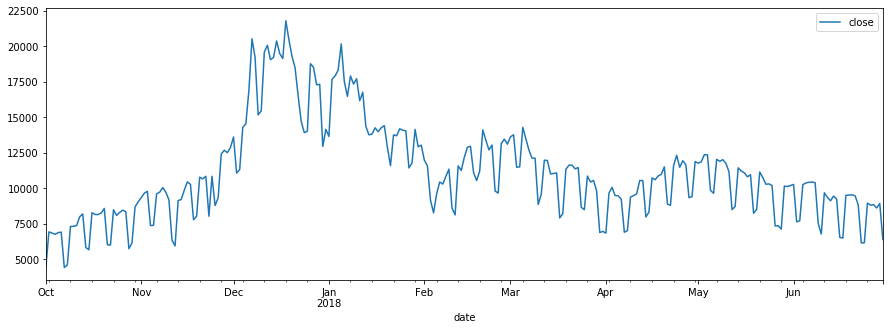

In [37]:
import matplotlib.pyplot as plt
portfolio['2017-Q4':'2018-Q2'].plot(y='close', figsize=(15,5))
plt.show()

In [63]:
import numpy as np

sp_reindened = sp.reindex(bitcoin.index
                         ).assign(
    volume=lambda x: x.volume.fillna(0),
    close=lambda x: x.close.fillna(method='ffill'),
    open=lambda x: np.where(x.open.isnull(), x.close, x.open),
    high=lambda x: np.where(x.high.isnull(), x.close, x.high),
    low=lambda x: np.where(x.low.isnull(), x.close, x.low),
    day_of_week= lambda x: x.index.day_name()
)

In [78]:
sp_reindened.head(10)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


In [79]:
fixed_portfolio = pd.concat(
    [sp_reindened,bitcoin], sort=False
).groupby(pd.Grouper(freq='D')).sum()

In [82]:
fixed_portfolio.head()

,high,low,open,close,volume
date,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,1.477750e+08
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,2.221850e+08
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3.955698e+09
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4.109836e+09
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4.272019e+09


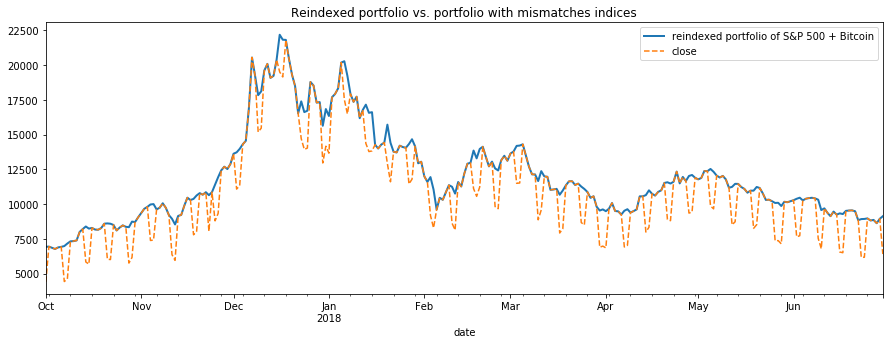

In [81]:
ax = fixed_portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', label='reindexed portfolio of S&P 500 + Bitcoin', figsize=(15, 5), linewidth=2, 
    title='Reindexed portfolio vs. portfolio with mismatches indices'
)

portfolio['2017-Q4':'2018-Q2'].plot(y='close', ax=ax, linestyle='--', figsize=(15,5))
plt.show()


In [75]:
fixed_portfolio.head()

,high,low,open,close,volume
date,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,1.477750e+08
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,2.221850e+08
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3.955698e+09
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4.109836e+09
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4.272019e+09


In [86]:
df1 = fixed_portfolio.reindex(['volume', 'high','low','open', 'close'], axis=1)

,volume,high,low,open,close
date,,,,,
2017-01-01,1.477750e+08,1003.080000,958.700000,963.660000,998.330000
2017-01-02,2.221850e+08,1031.390000,996.700000,998.620000,1021.750000
2017-01-03,3.955698e+09,3307.959883,3266.729883,3273.170068,3301.670078
2017-01-04,4.109836e+09,3432.240068,3306.000098,3306.000098,3425.480000
2017-01-05,4.272019e+09,3462.600000,3170.869951,3424.909932,3282.380000
